In [162]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
import pandas as pd
import torch
import re
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,accuracy_score,precision_recall_fscore_support
from Constants import *
from Preprocessing import *
from Models import *
import copy
from Utils import *
pd.set_option('display.max_rows', 200)


In [2]:
pd.read_csv('../data/digital_twin_ln_monograms.csv')

,id,L1A,L1B,L2A,L2B,L3,L4,L5A,L5B,L6,...,R1A,R1B,R2A,R2B,R3,R4,R5A,R5B,R6,RRPLN
0,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,10201,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,10202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
533,10203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
534,10204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data = DTDataset(use_smote=False)
data.processed_df.T
# data.processed_df#.shape, len(data.processed_df.index.unique())

id,3,5,6,7,8,9,10,11,13,14,...,10196,10197,10198,10199,10200,10201,10202,10203,10204,10205
hpv,1,0,1,1,1,1,-1,1,0,1,...,0,1,-1,0,1,1,0,1,0,1
age,55.969444,20.95,69.930556,72.319444,59.730556,60.083333,67.708333,57.858333,51.758333,56.25,...,47.619444,50.163889,70.888889,67.825,56.336111,49.566667,48.705556,77.116667,45.95,49.733333
packs_per_year,0.0,38.0,35.0,0.0,0.0,0.0,40.0,44.0,0.0,40.0,...,5.0,0.0,50.0,0.0,0.0,30.0,30.0,0.0,5.0,0.0
gender,1,1,0,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1
Aspiration rate Pre-therapy,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
total_dose,66.0,72.0,70.0,70.0,66.0,66.0,69.96,70.0,70.0,70.0,...,70.0,72.0,66.0,70.0,69.96,70.0,72.0,70.0,69.96,69.96
dose_fraction,2.2,1.8,2.121212,2.121212,2.2,2.2,2.12,2.121212,2.0,2.121212,...,2.121212,1.8,2.2,2.121212,2.12,2.121212,1.714286,2.333333,2.12,2.12
OS (Calculated),6.033333,7.333333,7.466667,7.8,8.066667,8.733333,9.1,9.8,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,148.366667,152.6,155.533333
Locoregional control (Time),4.7,7.333333,7.466667,7.8,8.066667,8.733333,6.7,8.5,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,148.366667,152.6,155.533333
FDM (months),6.033333,7.333333,7.466667,7.8,8.066667,6.633333,9.1,9.8,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,136.033333,152.6,155.533333


In [4]:
def state_loss(ytrue,ypred,subweights=None,weights=None):
    if weights is None:
        weights = [1,1,1,1]
    if subweights is None:
        subweights = [None,None,None]
    pd_loss = torch.mul(mc_loss(ytrue[0],ypred[0],weights=subweights[0]),weights[0])
    nd_loss = torch.mul(mc_loss(ytrue[1],ypred[1],weights=subweights[1]),weights[1])
    mod_loss = torch.mul(mc_loss(ytrue[2],ypred[2],weights=subweights[2]),weights[2])
    loss = torch.add(pd_loss,torch.add(nd_loss,mod_loss))
    dlt_true = ytrue[3]
    dlt_pred = ypred[3]
    ndlt = dlt_true.shape[1]
#     nloss = torch.nn.NLLLoss()
    bce = torch.nn.BCELoss()
    for i in range(ndlt):
        dlt_loss = bce(dlt_pred[:,i].view(-1),dlt_true[:,i].view(-1))
        dlt_loss = torch.mul(dlt_loss,weights[3]/ndlt)
        loss = torch.add(loss,dlt_loss)
    return loss

def outcome_loss(ytrue,ypred,weights=None,**kwargs):
    if weights is None:
        weights = [1,1,1,1]
    loss = 0
    nloss = torch.nn.BCELoss()
    for i in range(len(weights)):
        iloss = nloss(ypred[:,i],ytrue[i])*weights[i]
        loss += iloss
    return loss

In [6]:

        
def train_state(model=None,
                model_args={},
                state=1,
                split=.7,
                lr=.001,
                epochs=1000,
                patience=10,
                weights=None,
                save_path='../data/models/',
                use_default_split=True,
                use_bagging_split=False,
                resample_training=False,#use bootstraping on training data after splitting
                n_validation_trainsteps=2,
                verbose=True,
                balanced=True,
                sqrt_balance_weights=False,
                use_smote=False,
                smote_cols = None,
                file_suffix=''):
    
    ids = get_dt_ids()
    
    train_ids, test_ids = get_tt_split(use_default_split=use_default_split,use_bagging_split=use_bagging_split,resample_training=resample_training)

    if use_smote:
        if smote_cols is None:
            smote_cols = Const.outcomes
            if state == 1:
                smote_cols = Const.primary_disease_states
            elif state == 2:
                smote_cols = Const.primary_disease_states2
        dataset = DTDataset(use_smote=True,smote_ids = train_ids,smote_columns=[Const.decisions[state-1]])
        train_ids = [i for i in dataset.processed_df.index.values if i not in test_ids]
    else:
        dataset = DTDataset()
    
    #only train on people with  IC for state 1 since other people can't have any outcomes otherwise
    require = None
    if state == 1:
        require = Const.decisions[0] #we don't expect a state update if there is no treatment
        valid_ids = dataset.get_input_state(require=require).index.values
        train_ids = [t for t in train_ids if t in valid_ids]
        test_ids = [t for t in test_ids if t in valid_ids]
    xtrain = dataset.get_input_state(step=state,ids=train_ids,require=require)
    xtest = dataset.get_input_state(step=state,ids=test_ids,require=require)
    ytrain = dataset.get_intermediate_outcomes(step=state,ids=train_ids,require=require)
    ytest = dataset.get_intermediate_outcomes(step=state,ids=test_ids,require=require)
    
    model_args = {k:v for k,v in model_args.items() if 'attention' not in k and 'embed_size' not in k}
    if state < 3:
        if model is None:
                model = BayesianOutcomeSimulator(xtrain.shape[1],state=state,**model_args)
        lfunc = state_loss
        if weights is None:
            weights = [1,1,.1,1]
    else:
        if model is None:
                model = BayesianEndpointSimulator(xtrain.shape[1],**model_args)
        if weights is None:
            weights = [1,1,1,1]
        lfunc = outcome_loss
    print(model.passthrough)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.set_device(device)
    
    balance_weights=None
    if balanced:
        if state < 3:
            balance_weights = [w.to(device) for w in get_weights(ytrain)]
            if sqrt_balance_weights:
                balance_weights = [torch.sqrt(w) for w in balance_weights]
        else:
            print('I dont do balancing on the outputs because Idk how that would work')
    
    hashcode = str(hash(','.join([str(i) for i in train_ids])))
    save_file = save_path + 'model_' + model.identifier + '_split' + str(split) + '_resample' + str(resample_training) +  '_hash' + hashcode + file_suffix + '.tar'
    xtrain = df_to_torch(xtrain).to(device)
    
    xtest = df_to_torch(xtest).to(device)
    ytrain = [df_to_torch(t).to(device) for t in ytrain]
    ytest= [df_to_torch(t).to(device) for t in ytest]
    
    model.fit_normalizer(xtrain)
    
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    best_val_loss = 1000000000000000000000000000
    best_loss_metrics = {}
    last_epoch = False
    for epoch in range(epochs):
        
        model.train(True)
        optimizer.zero_grad()
        
        xtrain_sample = xtrain#[torch.randint(len(xtrain),(len(xtrain),) )]
        ypred = model(xtrain_sample,n_samples=1)
        loss = lfunc(ytrain,ypred,weights=weights,subweights=balance_weights)

        loss.backward()
        optimizer.step()
        if verbose:
            print('epoch',epoch,'train loss',loss.item())
        
        model.eval()
        yval = model(xtest,n_samples=1)
        val_loss = lfunc(ytest,yval,weights=weights,subweights=balance_weights)
        if state < 3:
            val_metrics = state_metrics(ytest,yval)
        else:
            val_metrics = outcome_metrics(ytest,yval)
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_loss_metrics = val_metrics
            steps_since_improvement = 0
            torch.save(model.state_dict(),save_file)
        else:
            steps_since_improvement += 1
        if verbose:
            print('val loss',val_loss.item())
            print('______________')
        if steps_since_improvement > patience:
            break
    print('best loss',best_val_loss,best_loss_metrics)
    model.load_state_dict(torch.load(save_file))
    
    #train one step on validation data
    for i in range(n_validation_trainsteps):
        model.train()
        yval = model(xtest,n_samples=1)
        val_loss = lfunc(ytest,yval,weights=weights)
        val_loss.backward()
        optimizer.step()
        torch.save(model.state_dict(),save_file)
    
    model.eval()
    print(model(xtest))
    return model,  best_val_loss, best_loss_metrics

from Models import *
t1_args = {'hidden_layers': [500,500],
   'dropout': 0.5,
   'input_dropout': 0.1}
tmodel_balanced = train_state(model_args=t1_args,state=1,lr=.0001,weights=[1,1,.01,1])
tmodel_balanced[-1]

True
epoch 0 train loss 2.9246139526367188
val loss 2.9064764976501465
______________
epoch 1 train loss 2.910817861557007
val loss 2.894562005996704
______________
epoch 2 train loss 2.8971641063690186
val loss 2.883117437362671
______________
epoch 3 train loss 2.8831229209899902
val loss 2.872058391571045
______________
epoch 4 train loss 2.8687567710876465
val loss 2.8613028526306152
______________
epoch 5 train loss 2.856264114379883
val loss 2.8508107662200928
______________
epoch 6 train loss 2.8502039909362793
val loss 2.8406436443328857
______________
epoch 7 train loss 2.83426570892334
val loss 2.830716609954834
______________
epoch 8 train loss 2.818946123123169
val loss 2.821019172668457
______________
epoch 9 train loss 2.8079466819763184
val loss 2.811469793319702
______________
epoch 10 train loss 2.795222520828247
val loss 2.8021419048309326
______________
epoch 11 train loss 2.7956902980804443
val loss 2.7930028438568115
______________
epoch 12 train loss 2.78143548965

{'pd': {'accuracy': 0.30952380952380953,
  'auc_micro': 0.5827835880933225,
  'auc_mean': 0.5077958453202784,
  'auc_weighted': 0.538748790823423},
 'nd': {'accuracy': 0.2962962962962963,
  'auc_micro': 0.16090104585679804,
  'auc_mean': 0.415167297979798,
  'auc_weighted': 0.3375},
 'mod': {'accuracy': 0.2962962962962963,
  'auc_micro': 0.16090104585679804,
  'auc_mean': 0.415167297979798,
  'auc_weighted': 0.3375},
 'dlts': {'accuracy': [0.8035714285714286,
   0.9464285714285714,
   0.8928571428571429,
   0.7857142857142857,
   0.9107142857142857],
  'accuracy_mean': 0.8678571428571429,
  'auc': [0.5717171717171716,
   0.270440251572327,
   0.5366666666666666,
   0.5738636363636364,
   0.6941176470588235],
  'auc_mean': 0.5293610746757251}}

In [7]:
tmodel2_balanced = train_state(model_args=t1_args,state=2,lr=.001,weights=[1,1,.01,1],use_smote=False)
tmodel2_balanced[-1]

True
epoch 0 train loss 2.741570234298706
val loss 2.6823880672454834
______________
epoch 1 train loss 2.6366899013519287
val loss 2.6019177436828613
______________
epoch 2 train loss 2.551056385040283
val loss 2.536437749862671
______________
epoch 3 train loss 2.466085195541382
val loss 2.4856648445129395
______________
epoch 4 train loss 2.4055845737457275
val loss 2.450288772583008
______________
epoch 5 train loss 2.338240385055542
val loss 2.4281699657440186
______________
epoch 6 train loss 2.256446123123169
val loss 2.4168622493743896
______________
epoch 7 train loss 2.2718446254730225
val loss 2.41338849067688
______________
epoch 8 train loss 2.2067532539367676
val loss 2.4155497550964355
______________
epoch 9 train loss 2.1941990852355957
val loss 2.4195990562438965
______________
epoch 10 train loss 2.126340866088867
val loss 2.424147129058838
______________
epoch 11 train loss 2.0774142742156982
val loss 2.430081844329834
______________
epoch 12 train loss 2.05538773536

{'pd': {'accuracy': 0.4333686815129021,
  'auc_micro': 0.7973484848484849,
  'auc_mean': 0.6191478736363257,
  'auc_weighted': 0.6663874443316984},
 'nd': {'accuracy': 0.32976306394027916,
  'auc_micro': 0.725271867612293,
  'auc_mean': 0.6364587054864368,
  'auc_weighted': 0.5450567329135051},
 'mod': {'accuracy': 0.32976306394027916,
  'auc_micro': 0.725271867612293,
  'auc_mean': 0.6364587054864368,
  'auc_weighted': 0.5450567329135051},
 'dlts': {'accuracy': [0.9183673469387755,
   0.9795918367346939,
   0.9659863945578231,
   0.9523809523809523,
   0.9659863945578231],
  'accuracy_mean': 0.9564625850340136,
  'auc': [0.5438271604938272,
   0.6944444444444444,
   0.6267605633802817,
   0.6540816326530612,
   0.5309859154929577],
  'auc_mean': 0.6100199432929144}}

In [11]:
tmodel1 = train_state(model_args=t1_args,state=1,lr=.0001,weights=[1,1,.1,1],balanced=False)
tmodel1[1]

True
epoch 0 train loss 3.0552778244018555
val loss 3.042379140853882
______________
epoch 1 train loss 3.0480499267578125
val loss 3.027387857437134
______________
epoch 2 train loss 3.031132936477661
val loss 3.0126237869262695
______________
epoch 3 train loss 3.0098159313201904
val loss 2.9980766773223877
______________
epoch 4 train loss 2.9929678440093994
val loss 2.9836809635162354
______________
epoch 5 train loss 2.9814090728759766
val loss 2.969456672668457
______________
epoch 6 train loss 2.9657716751098633
val loss 2.9553520679473877
______________
epoch 7 train loss 2.9523818492889404
val loss 2.94132137298584
______________
epoch 8 train loss 2.937350034713745
val loss 2.927323341369629
______________
epoch 9 train loss 2.9253435134887695
val loss 2.913331985473633
______________
epoch 10 train loss 2.9079360961914062
val loss 2.899263381958008
______________
epoch 11 train loss 2.8881499767303467
val loss 2.885158061981201
______________
epoch 12 train loss 2.8754868507

val loss 2.266247272491455
______________
epoch 104 train loss 2.1178019046783447
val loss 2.265064239501953
______________
epoch 105 train loss 2.1312694549560547
val loss 2.2639119625091553
______________
epoch 106 train loss 2.113616466522217
val loss 2.2628250122070312
______________
epoch 107 train loss 2.1096081733703613
val loss 2.2618331909179688
______________
epoch 108 train loss 2.116175889968872
val loss 2.2609293460845947
______________
epoch 109 train loss 2.111454486846924
val loss 2.260030508041382
______________
epoch 110 train loss 2.127520799636841
val loss 2.259195566177368
______________
epoch 111 train loss 2.1075727939605713
val loss 2.2584075927734375
______________
epoch 112 train loss 2.104184865951538
val loss 2.2576076984405518
______________
epoch 113 train loss 2.103817939758301
val loss 2.2568721771240234
______________
epoch 114 train loss 2.099405288696289
val loss 2.2562198638916016
______________
epoch 115 train loss 2.108187675476074
val loss 2.25558

2.2453458309173584

In [8]:
tmodel2 = train_state(model_args=t1_args,state=2,lr=.001,weights=[1,1,.01,1],balanced=False)
tmodel2[-1]

True
epoch 0 train loss 2.7071456909179688
val loss 2.6055264472961426
______________
epoch 1 train loss 2.573516845703125
val loss 2.470937490463257
______________
epoch 2 train loss 2.438856363296509
val loss 2.332670211791992
______________
epoch 3 train loss 2.2946250438690186
val loss 2.200162887573242
______________
epoch 4 train loss 2.164583444595337
val loss 2.0866942405700684
______________
epoch 5 train loss 2.039287567138672
val loss 2.0000171661376953
______________
epoch 6 train loss 1.9442684650421143
val loss 1.9412273168563843
______________
epoch 7 train loss 1.8842567205429077
val loss 1.9090919494628906
______________
epoch 8 train loss 1.8476847410202026
val loss 1.8966057300567627
______________
epoch 9 train loss 1.831443428993225
val loss 1.8981680870056152
______________
epoch 10 train loss 1.8239835500717163
val loss 1.9081344604492188
______________
epoch 11 train loss 1.837939977645874
val loss 1.9192981719970703
______________
epoch 12 train loss 1.82726621

{'pd': {'accuracy': 0.3333333333333333,
  'auc_micro': 0.8870884773662552,
  'auc_mean': 0.5600734967453508,
  'auc_weighted': 0.568259504072492},
 'nd': {'accuracy': 0.3717624148003895,
  'auc_micro': 0.7560047281323876,
  'auc_mean': 0.4938207116623421,
  'auc_weighted': 0.5447123303895488},
 'mod': {'accuracy': 0.3717624148003895,
  'auc_micro': 0.7560047281323876,
  'auc_mean': 0.4938207116623421,
  'auc_weighted': 0.5447123303895488},
 'dlts': {'accuracy': [0.9183673469387755,
   0.9795918367346939,
   0.9659863945578231,
   0.9523809523809523,
   0.9659863945578231],
  'accuracy_mean': 0.9564625850340136,
  'auc': [0.5635802469135802,
   0.7268518518518519,
   0.6253521126760564,
   0.6132653061224489,
   0.5521126760563381],
  'auc_mean': 0.6162324387240551}}

In [13]:
tmodel3 = train_state(model_args=t1_args,state=3,lr=.0001,weights=[.01,1,1,.01],balanced=False)
tmodel3[-1]

True
epoch 0 train loss 1.4292857646942139
val loss 1.4016540050506592
______________
epoch 1 train loss 1.3956944942474365
val loss 1.3745684623718262
______________
epoch 2 train loss 1.3771278858184814
val loss 1.3488870859146118
______________
epoch 3 train loss 1.3410319089889526
val loss 1.3244856595993042
______________
epoch 4 train loss 1.3169399499893188
val loss 1.3013920783996582
______________
epoch 5 train loss 1.2874538898468018
val loss 1.2796359062194824
______________


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

epoch 6 train loss 1.2715859413146973
val loss 1.2591502666473389
______________
epoch 7 train loss 1.2396479845046997
val loss 1.2398937940597534
______________
epoch 8 train loss 1.2202237844467163
val loss 1.2217590808868408
______________
epoch 9 train loss 1.2077131271362305
val loss 1.204825758934021
______________
epoch 10 train loss 1.1735689640045166
val loss 1.1889309883117676
______________
epoch 11 train loss 1.158888816833496
val loss 1.1740738153457642
______________
epoch 12 train loss 1.139923095703125


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.1602275371551514
______________
epoch 13 train loss 1.1291403770446777
val loss 1.1473463773727417
______________
epoch 14 train loss 1.1136775016784668
val loss 1.1353927850723267
______________
epoch 15 train loss 1.098105788230896
val loss 1.1243001222610474
______________
epoch 16 train loss 1.08689546585083
val loss 1.1140670776367188
______________
epoch 17 train loss 1.0735092163085938
val loss 1.1046546697616577
______________
epoch 18 train loss 1.0591367483139038
val loss 1.0959888696670532
______________
epoch 19 train loss 1.0531692504882812


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.088071346282959
______________
epoch 20 train loss 1.0535789728164673
val loss 1.0808155536651611
______________
epoch 21 train loss 1.037304162979126
val loss 1.0741848945617676
______________
epoch 22 train loss 1.0257229804992676
val loss 1.0681098699569702
______________
epoch 23 train loss 1.014333724975586
val loss 1.0625427961349487
______________
epoch 24 train loss 1.0072698593139648
val loss 1.0574361085891724
______________
epoch 25 train loss 0.9975789189338684
val loss 1.0527106523513794
______________
epoch 26 train loss 0.9942598342895508


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0483494997024536
______________
epoch 27 train loss 0.9835821390151978
val loss 1.0442748069763184
______________
epoch 28 train loss 0.9807164072990417
val loss 1.0404502153396606
______________
epoch 29 train loss 0.9671230316162109
val loss 1.036831259727478
______________
epoch 30 train loss 0.9785213470458984
val loss 1.0333733558654785
______________
epoch 31 train loss 0.9578047394752502
val loss 1.03003990650177
______________
epoch 32 train loss 0.9632419943809509


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0267846584320068
______________
epoch 33 train loss 0.9474247097969055
val loss 1.0235930681228638
______________
epoch 34 train loss 0.9537546634674072
val loss 1.0204100608825684
______________
epoch 35 train loss 0.9354709982872009
val loss 1.0172271728515625
______________
epoch 36 train loss 0.9323920607566833
val loss 1.014045000076294
______________
epoch 37 train loss 0.9353927969932556
val loss 1.0108383893966675
______________
epoch 38 train loss 0.9276844263076782
val loss 1.0076154470443726
______________
epoch 39 train loss 0.9303597807884216


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0043514966964722
______________
epoch 40 train loss 0.917347252368927
val loss 1.0010257959365845
______________
epoch 41 train loss 0.9077025055885315
val loss 0.9976743459701538
______________
epoch 42 train loss 0.9215534329414368
val loss 0.994259238243103
______________
epoch 43 train loss 0.9013230800628662
val loss 0.9908232688903809
______________
epoch 44 train loss 0.8945472240447998
val loss 0.9873649477958679
______________
epoch 45 train loss 0.888656497001648
val loss 0.983891487121582
______________
epoch 46 train loss 0.885872483253479


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9804412126541138
______________
epoch 47 train loss 0.879047155380249
val loss 0.9770286679267883
______________
epoch 48 train loss 0.879341185092926
val loss 0.9736419320106506
______________
epoch 49 train loss 0.8708968162536621
val loss 0.9702772498130798
______________
epoch 50 train loss 0.8682073950767517
val loss 0.9669115543365479
______________
epoch 51 train loss 0.8687166571617126
val loss 0.9635626673698425
______________
epoch 52 train loss 0.8675985336303711
val loss 0.9602450728416443
______________
epoch 53 train loss 0.8630563616752625


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9569997191429138
______________
epoch 54 train loss 0.8493541479110718
val loss 0.9538214802742004
______________
epoch 55 train loss 0.8391704559326172
val loss 0.9507038593292236
______________
epoch 56 train loss 0.8480535745620728
val loss 0.947654664516449
______________
epoch 57 train loss 0.8370794057846069
val loss 0.9446524381637573
______________
epoch 58 train loss 0.8434727787971497
val loss 0.9417073726654053
______________
epoch 59 train loss 0.8325881361961365


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9388141632080078
______________
epoch 60 train loss 0.8264032006263733
val loss 0.9359993934631348
______________
epoch 61 train loss 0.8291631937026978
val loss 0.9332582354545593
______________
epoch 62 train loss 0.8112735748291016
val loss 0.9306032657623291
______________
epoch 63 train loss 0.8057849407196045
val loss 0.9280235767364502
______________
epoch 64 train loss 0.8105888366699219
val loss 0.9254921078681946
______________


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

epoch 65 train loss 0.8000028133392334
val loss 0.9230351448059082
______________
epoch 66 train loss 0.7872719764709473
val loss 0.9206463694572449
______________
epoch 67 train loss 0.8042251467704773
val loss 0.9183100461959839
______________
epoch 68 train loss 0.7793211340904236
val loss 0.9160642027854919
______________
epoch 69 train loss 0.7767583131790161
val loss 0.9138808250427246
______________
epoch 70 train loss 0.7892070412635803
val loss 0.911765992641449
______________
epoch 71 train loss 0.7770106792449951


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9097027778625488
______________
epoch 72 train loss 0.7794652581214905
val loss 0.9077162146568298
______________
epoch 73 train loss 0.7850291132926941
val loss 0.9058481454849243
______________
epoch 74 train loss 0.7755729556083679
val loss 0.9040737748146057
______________
epoch 75 train loss 0.7765383124351501
val loss 0.9023832678794861
______________
epoch 76 train loss 0.7580458521842957
val loss 0.9007712602615356
______________
epoch 77 train loss 0.7584857940673828
val loss 0.8992282748222351
______________
epoch 78 train loss 0.7564924955368042


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


val loss 0.8977898359298706
______________
epoch 79 train loss 0.7485625743865967
val loss 0.8964135646820068
______________
epoch 80 train loss 0.7487670183181763
val loss 0.8951281905174255
______________
epoch 81 train loss 0.754023015499115
val loss 0.8939167261123657
______________
epoch 82 train loss 0.7361582517623901
val loss 0.8927702307701111
______________
epoch 83 train loss 0.7349911332130432
val loss 0.8917086720466614
______________
epoch 84 train loss 0.7271255850791931
val loss 0.890721321105957
______________
epoch 85 train loss 0.7355337738990784
val loss 0.8898133635520935
______________
epoch 86 train loss 0.7126432657241821
val loss 0.8889457583427429
______________
epoch 87 train loss 0.7309193015098572
val loss 0.8881422281265259
______________
epoch 88 train loss 0.7155585885047913
val loss 0.8873802423477173
______________
epoch 89 train loss 0.724664032459259
val loss 0.8866629004478455
______________
epoch 90 train loss 0.7191351056098938
val loss 0.88597601

{'Overall Survival (4 Years)': {'accuracy': 0.891156462585034,
  'mse': 0.107049614,
  'auc': 0.5276717557251908,
  'precision': 0.891156462585034,
  'recall': 1.0,
  'f1': 0.9424460431654677},
 'FT': {'accuracy': 0.7891156462585034,
  'mse': 0.1573659,
  'auc': 0.7097826086956522,
  'precision': 0.5384615384615384,
  'recall': 0.21875,
  'f1': 0.3111111111111111},
 'Aspiration rate Post-therapy': {'accuracy': 0.8027210884353742,
  'mse': 0.12501521,
  'auc': 0.8041958041958042,
  'precision': 0.38461538461538464,
  'recall': 0.19230769230769232,
  'f1': 0.2564102564102564},
 'LRC': {'accuracy': 0.8979591836734694,
  'mse': 0.09541575,
  'auc': 0.6893939393939394,
  'precision': 0.8979591836734694,
  'recall': 1.0,
  'f1': 0.9462365591397849}}

In [9]:
tmodel3_balanced = train_state(model_args=t1_args,state=3,lr=.001,weights=[.01,1,1,.01])
tmodel3_balanced[-1]

True
I dont do balancing on the outputs because Idk how that would work
epoch 0 train loss 1.382777214050293
val loss 1.1800198554992676
______________
epoch 1 train loss 1.1526904106140137
val loss 1.0888510942459106
______________
epoch 2 train loss 1.0276836156845093
val loss 1.0692726373672485
______________
epoch 3 train loss 0.9873437881469727
val loss 1.0796997547149658
______________
epoch 4 train loss 0.988479733467102
val loss 1.0808898210525513
______________
epoch 5 train loss 0.9603074193000793
val loss 1.0635619163513184
______________
epoch 6 train loss 0.930046796798706


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0322246551513672
______________
epoch 7 train loss 0.8884117007255554
val loss 0.995944082736969
______________
epoch 8 train loss 0.8531663417816162
val loss 0.9630366563796997
______________
epoch 9 train loss 0.805483341217041
val loss 0.9384427666664124
______________
epoch 10 train loss 0.7779001593589783
val loss 0.9226058125495911
______________
epoch 11 train loss 0.7570487856864929
val loss 0.913118302822113
______________
epoch 12 train loss 0.757951021194458
val loss 0.9071265459060669
______________
epoch 13 train loss 0.7226725220680237


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9036306738853455
______________
epoch 14 train loss 0.7021142244338989
val loss 0.9020879864692688
______________
epoch 15 train loss 0.692624568939209
val loss 0.9033390283584595
______________
epoch 16 train loss 0.6862009167671204
val loss 0.9084047675132751
______________
epoch 17 train loss 0.6679248809814453
val loss 0.9177655577659607
______________
epoch 18 train loss 0.6521704792976379
val loss 0.9301044940948486
______________
epoch 19 train loss 0.6382395029067993
val loss 0.9445061683654785
______________
epoch 20 train loss 0.6208774447441101
val loss 0.9590514898300171
______________
epoch 21 train loss 0.6105832457542419
val loss 0.9708570837974548
______________
epoch 22 train loss 0.5978299975395203
val loss 0.9790686964988708
______________
epoch 23 train loss 0.5932507514953613
val loss 0.9825392365455627
______________
epoch 24 train loss 0.5712330937385559
val loss 0.9834073781967163
______________
epoch 25 train loss 0.5611336827278137
val loss 0.982848

{'Overall Survival (4 Years)': {'accuracy': 0.891156462585034,
  'mse': 0.123255804,
  'auc': 0.5353053435114503,
  'precision': 0.891156462585034,
  'recall': 1.0,
  'f1': 0.9424460431654677},
 'FT': {'accuracy': 0.8027210884353742,
  'mse': 0.16025907,
  'auc': 0.6828804347826086,
  'precision': 0.8,
  'recall': 0.125,
  'f1': 0.21621621621621623},
 'Aspiration rate Post-therapy': {'accuracy': 0.8027210884353742,
  'mse': 0.12794043,
  'auc': 0.7749523204068658,
  'precision': 0.2,
  'recall': 0.038461538461538464,
  'f1': 0.06451612903225806},
 'LRC': {'accuracy': 0.8979591836734694,
  'mse': 0.10525548,
  'auc': 0.7025252525252524,
  'precision': 0.8979591836734694,
  'recall': 1.0,
  'f1': 0.9462365591397849}}

In [14]:
[m[1] for m in [tmodel1,tmodel_balanced,tmodel2,tmodel2_balanced,tmodel3,tmodel3_balanced]]

[2.2453458309173584,
 2.5263664722442627,
 1.8966057300567627,
 2.41338849067688,
 0.8797003030776978,
 0.9020879864692688]

In [15]:
tmodel1[0].set_device('cpu')
tmodel2[0].set_device('cpu')


torch.save(tmodel1[0],'../resources/transition1_model.pt')
torch.save(tmodel2[0],'../resources/transition2_model.pt')

# tmodel3[0].set_device('cpu')
# torch.save(tmodel3[0],'../resources/outcome_model.pt')
tmodel3[0].set_device('cpu')
torch.save(tmodel3[0],'../resources/outcome_model.pt')

In [16]:
def merge_tmodel_results(t1,t2,t3):
    r1 = t1[-1]
    r2 = t2[-1]
    r3 = t3[-1]
    res_list = []
    for state, result in enumerate([r1,r2,r3]):
        for outcome, metricdict in result.items():
            if outcome == 'dlts':
                for metric, values in metricdict.items():
                    try:
                        for dltname, value in zip(Const.dlt1,values):
                            entry = {
                                'state': state + 1,
                                'outcome': dltname,
                                'metric': metric,
                                'value': value,
                            }
                            res_list.append(entry)
                    except:
                        entry = {
                            'state': state + 1,
                            'outcome': outcome,
                            'metric': metric,
                            'value': values
                        }
                        res_list.append(entry)
            else:
                for metric, value in metricdict.items():
                    entry = {
                        'state': state + 1,
                        'outcome': outcome,
                        'metric': metric,
                        'value': value
                    }
                    res_list.append(entry)
    return pd.DataFrame(res_list)
import time
model_results = merge_tmodel_results(tmodel1,tmodel2,tmodel3_balanced)
model_results.to_csv('../results/transition_models_' + str(time.time()) + '.csv')
model_results_balanced = merge_tmodel_results(tmodel_balanced,tmodel2_balanced,tmodel3_balanced)
model_results_balanced

,state,outcome,metric,value
0,1,pd,accuracy,0.309524
1,1,pd,auc_micro,0.582784
2,1,pd,auc_mean,0.507796
3,1,pd,auc_weighted,0.538749
4,1,nd,accuracy,0.296296
5,1,nd,auc_micro,0.160901
6,1,nd,auc_mean,0.415167
7,1,nd,auc_weighted,0.337500
8,1,mod,accuracy,0.296296
9,1,mod,auc_micro,0.160901


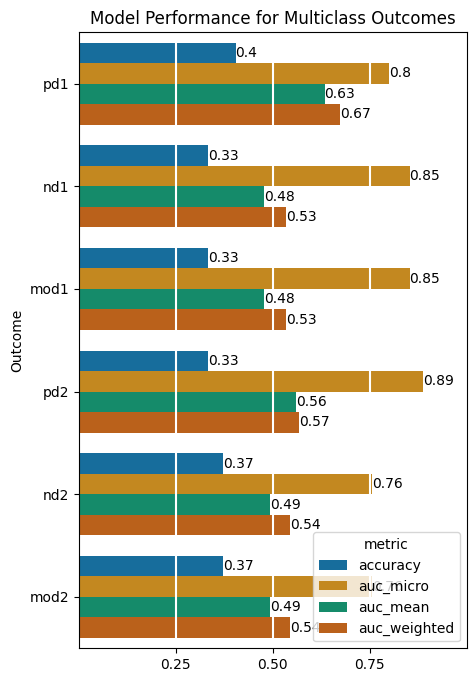

In [17]:
from matplotlib.container import BarContainer
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
def plot_mc_results(mr,title='Model Performance for Multiclass Outcomes'):
    temp = mr.copy()
    temp['title'] = temp['outcome'] + temp['state'].astype(str)
    temp = temp.groupby('title').filter(lambda x: x[x.metric == 'auc_micro'].shape[0] > 0).reset_index()
    metrics = set(['auc_mean','accuracy','auc_micro','auc_weighted'])
    temp = temp[temp.metric.apply(lambda x: x in metrics)]
    temp = temp[temp.outcome.apply(lambda x: x not in ['Overall Survival (4 Years)', 'LRC'])]
    fig,ax = plt.subplots(1,1,figsize=(5,8))
    sns.barplot(
        data=temp,
        y='title',
        x='value',
        orient='h',
        hue='metric',
        ax=ax,
        palette='colorblind',
    )
    ax.set_title(title)
    ax.set_ylabel('Outcome')
    ax.set_xlabel('')
    ax.axvline(.5,c='white')
    ax.axvline(.75,c='white')
    ax.axvline(.25,c="white")
    ax.set_xlim(0,1)
    ax.set_xticks([.25,.5,.75])
    for container in ax.containers:
        for patch,value in zip(container.patches,container.datavalues):
            x,y = patch.xy
            x = x + patch._width
            y = y + (patch._height/2)
            value = np.round(value,2)
            ax.text(x,y,str(value),verticalalignment='center')

plot_mc_results(model_results)

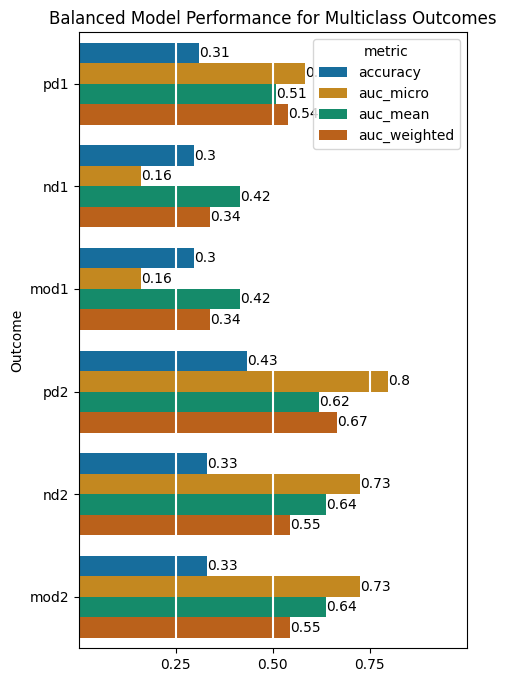

In [18]:
plot_mc_results(model_results_balanced,title="Balanced Model Performance for Multiclass Outcomes")

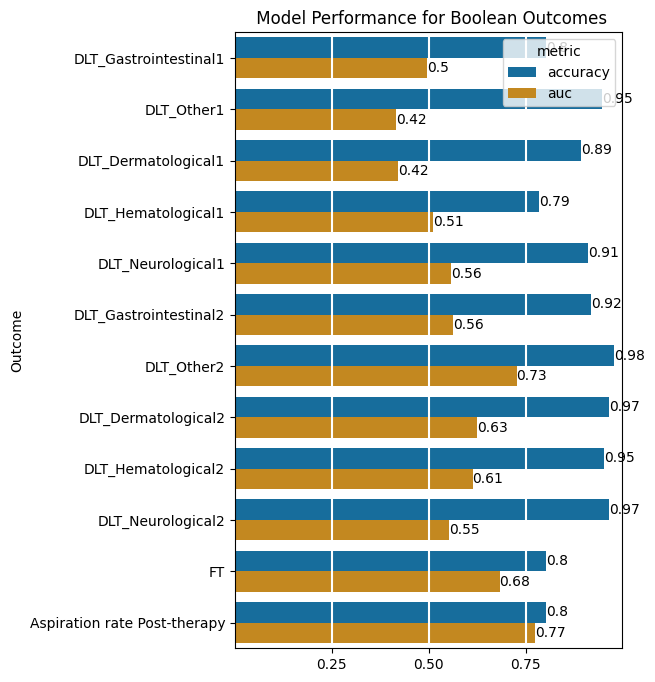

In [19]:
def plot_bool_results(mr,model_name=''):
    temp = mr.copy()
    temp['title'] = temp['outcome'] + temp['state'].apply(lambda x: str(x) if x < 3 else '')
    temp = temp.groupby('title').filter(lambda x: x[x.metric == 'auc'].shape[0] > 0).reset_index()
    metrics = set(['auc','accuracy'])
    temp = temp[temp.metric.apply(lambda x: x in metrics)]
    temp = temp[temp.outcome.apply(lambda x: x not in ['Overall Survival (4 Years)', 'LRC'])]
    fig,ax = plt.subplots(1,1,figsize=(5,8))
    sns.barplot(
        data=temp,
        y='title',
        x='value',
        orient='h',
        hue='metric',
        ax=ax,
        palette='colorblind',
    )
    ax.set_title(model_name + ' Model Performance for Boolean Outcomes')
    ax.set_ylabel('Outcome')
    ax.set_xlabel('')
    ax.axvline(.5,c='white')
    ax.axvline(.75,c='white')
    ax.axvline(.25,c="white")
    ax.set_xticks([.25,.5,.75])
    ax.set_xlim(0,1)
    for container in ax.containers:
        for patch,value in zip(container.patches,container.datavalues):
            x,y = patch.xy
            x = x + patch._width
            y = y + (patch._height/2)
            value = np.round(value,2)
            ax.text(x,y,str(value),verticalalignment='center')
plot_bool_results(model_results)

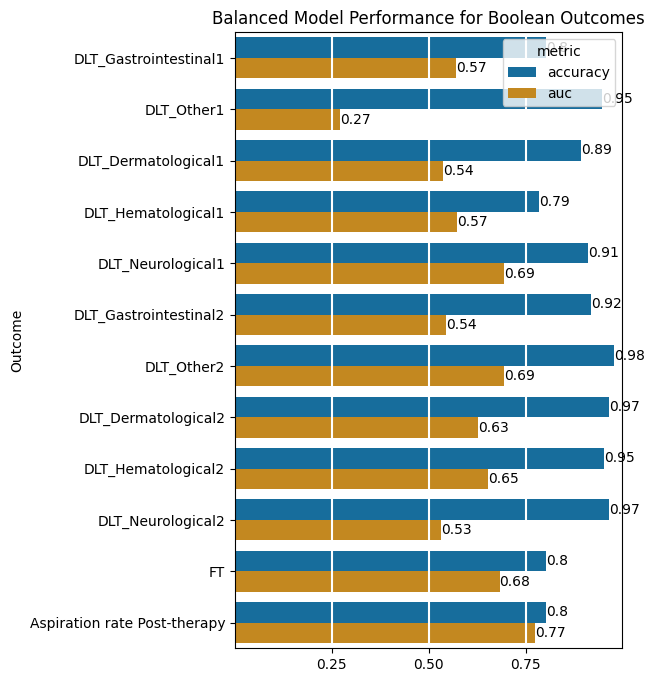

In [20]:
plot_bool_results(model_results_balanced,'Balanced')

0
Axes(0.125,0.653529;0.0407895x0.226471)
1
Axes(0.173947,0.653529;0.0407895x0.226471)
2
Axes(0.222895,0.653529;0.0407895x0.226471)
3
Axes(0.271842,0.653529;0.0407895x0.226471)
4
Axes(0.320789,0.653529;0.0407895x0.226471)
5
Axes(0.369737,0.653529;0.0407895x0.226471)
6
Axes(0.418684,0.653529;0.0407895x0.226471)
7
Axes(0.467632,0.653529;0.0407895x0.226471)
8
Axes(0.516579,0.653529;0.0407895x0.226471)
9
Axes(0.565526,0.653529;0.0407895x0.226471)
10
Axes(0.614474,0.653529;0.0407895x0.226471)
11
Axes(0.663421,0.653529;0.0407895x0.226471)
12
Axes(0.712368,0.653529;0.0407895x0.226471)
13
Axes(0.761316,0.653529;0.0407895x0.226471)
14
Axes(0.810263,0.653529;0.0407895x0.226471)
15
Axes(0.859211,0.653529;0.0407895x0.226471)
0
Axes(0.125,0.381765;0.0407895x0.226471)
1
Axes(0.173947,0.381765;0.0407895x0.226471)
2
Axes(0.222895,0.381765;0.0407895x0.226471)
3
Axes(0.271842,0.381765;0.0407895x0.226471)
4
Axes(0.320789,0.381765;0.0407895x0.226471)
5
Axes(0.369737,0.381765;0.0407895x0.226471)
6
Axes(0.4

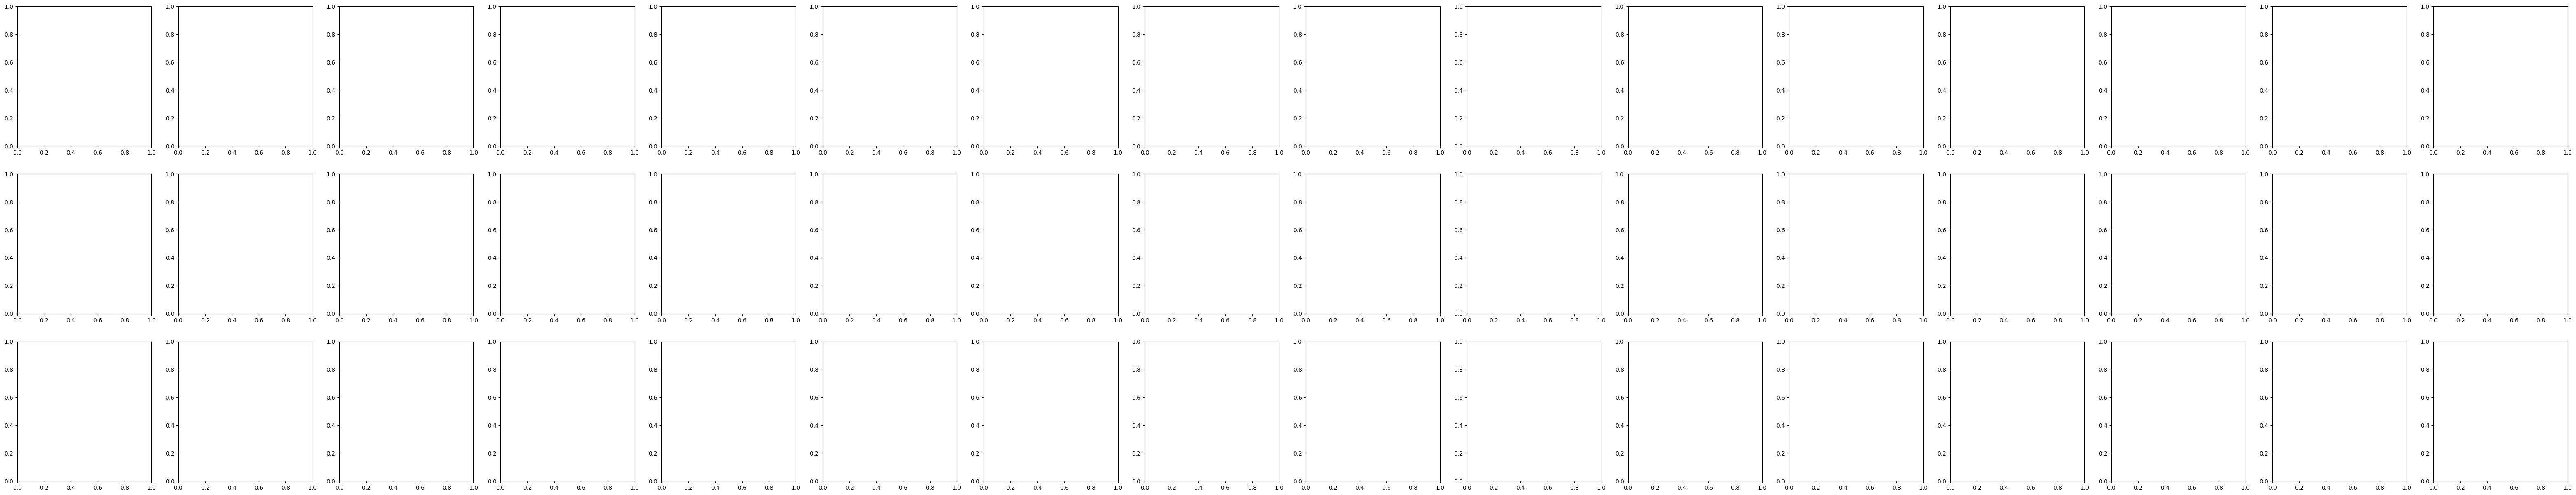

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
metrics = set(['auc','accuracy','f1','auc_weighted'])
subdf = model_results[model_results.metric.apply(lambda x: x in metrics)]
lengths = [subdf[subdf.state == i+1].shape[0] for i in range(3)]
fig, axes = plt.subplots(3,max(lengths),figsize=(5*max(lengths),15))
for i in range(3):
    axx = axes[i]
    subsubdf = subdf[subdf.state == i + 1]
    ii =0
    for iii,row in subsubdf.iterrows():
        ax = axes[i,ii]
        ii += 1
        

In [ ]:
#outdated code for doing an ensembel of stuff instead of using bayesian inference via dropout
def train_model_ensemble(model_arg_list,state,
                         n_bags=20,
                         smote_options=[True,False],
                         smote_baseline_options=[True,False],
                         weight_options=[None],
                         weight_baseline_options=[None],
                         **kwargs):
    resampled_models =[]
    base_models = []
    base_metrics = []
    resample_metrics = []
    base_losses = []
    resample_losses = []
    n_errors = 0
    for margs in model_arg_list:
        for s in smote_baseline_options:
            for w in weight_baseline_options:
                [base_model,blosses,bmetrics] = train_state(model_args=margs,state=state,
                                         resample_training=False,
                                         use_smote=smote_options,
                                         weights=w,
                                         verbose=False,**kwargs)
                base_models.append(base_model)
                base_metrics.append(bmetrics)
                base_losses.append(blosses)
        for n in range(n_bags):
            for s in smote_options:
                for w in weight_options:
                    #this can fail if I resample a bad distribution with no minority classes
                    done = False
                    while not done:
                        try:
                            [model,loss,metrics] = train_state(model_args=margs,
                                                state=state,resample_training=True,
                                                use_smote=s,
                                                weights=w,
                                                verbose=False,**kwargs)
                            resampled_models.append(model)
                            resample_metrics.append(metrics)
                            resample_losses.append(loss)
                            done=True
                            print('model_done',len(base_models)+len(resampled_models))
                        except Exception as e:
                            print('error training model')
                            print(e)
                            n_errors += 1
    print('done with',n_errors,'errors')
    return base_models,resampled_models